In [ ]:
import torch

In [ ]:
x = torch.tensor(3.0, requires_grad=True)

*   3.0 → a scalar (0-dimensional) tensor
*   requires_grad=True → PyTorch will record operations on x so it can compute derivatives w.r.t. x using autograd



In [ ]:
y = x**2

In [ ]:
x

tensor(3., requires_grad=True)

In [ ]:
y

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
y.backward()

Compute the derivative of y with respect to all leaf tensors that were used to create y.”

Since x is a leaf tensor with requires_grad=True, PyTorch computes:

𝑑
𝑦/
𝑑
𝑥

i.e 2x

PyTorch then stores the result in: x.grad
	​


In [ ]:
x.grad

tensor(6.)

In [ ]:
# eg 2: y = x**2, z = sin(y),  for any x what is dz/dx?
# Manual approach:
import math
def dz_dx(x):
  return 2 * x * math.cos(x**2)

dz_dx(3)

-5.466781571308061

In [ ]:
x = torch.tensor(3.0, requires_grad=True)

In [ ]:
y = x**2

In [ ]:
z = torch.sin(y)

In [ ]:
x, y, z  # These are the values we got in forward direction in computation graph

(tensor(3., requires_grad=True),
 tensor(9., grad_fn=<PowBackward0>),
 tensor(0.4121, grad_fn=<SinBackward0>))

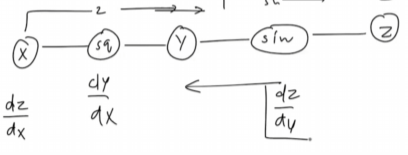

In [ ]:
z.backward()

In [ ]:
x.grad

tensor(-5.4668)

In [ ]:
y.grad # You cannot calculate it because autograd donot calulcate for intermediate nodes. It does only for leaf and root node.

/tmp/ipython-input-840821276.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  y.grad # You cannot calculate it because autograd donot calulcate for intermediate nodes. It does only for leaf and root node.


In [ ]:
import torch

# Inputs
x = torch.tensor(6.7) #input feature
y = torch.tensor(0.0) # True label (binary)

w = torch.tensor(1.0) # weight
b = torch.tensor(0.0) #bias


In [ ]:
# Binary Cross Entropy Loss : -[y_target.ln(ypred)+(1-y_target).ln(1-ypred)]

def binary_cross_entropy_loss(prediction, target):
  epsilon = 1e-8 #to prevent log(0)
  prediction = torch.clamp(prediction, epsilon, 1-epsilon)
  return -(target*torch.log(prediction)+(1-target)*torch.log(1-prediction))

In [ ]:
# Forward pass
z = w * x + b #weighted sum
y_pred = torch.sigmoid(z) #activation function

# Calculate loss
loss = binary_cross_entropy_loss(y_pred, y)

In [ ]:
loss

tensor(6.7012)

In [ ]:
# Derivatives:
# 1. dL/d(y_pred): Loss with respect to the prediction (y_pred)
dloss_dy_pred = (y_pred - y)/(y_pred*(1-y_pred))

# 2. dy_pred/dz: Prediction (y_pred) with respect to z (sigmoid derivative)
dy_pred_dz = y_pred * (1 - y_pred)

# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x  # dz/dw = x
dz_db = 1  # dz/db = 1 (bias contributes directly to z)

dL_dw = dloss_dy_pred * dy_pred_dz * dz_dw
dL_db = dloss_dy_pred * dy_pred_dz * dz_db

In [ ]:
print(f"Manual Gradient of loss w.r.t weight (dw): {dL_dw}")
print(f"Manual Gradient of loss w.r.t bias (db): {dL_db}")

Manual Gradient of loss w.r.t weight (dw): 6.691762447357178
Manual Gradient of loss w.r.t bias (db): 0.998770534992218


In [ ]:
# Now lets do this with autograd

x = torch.tensor(6.7)
y = torch.tensor(0.0)

In [ ]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

In [ ]:
w

tensor(1., requires_grad=True)

In [ ]:
b

tensor(0., requires_grad=True)

In [ ]:
z = w*x+b

In [ ]:
z

tensor(6.7000, grad_fn=<AddBackward0>)

In [ ]:
y_pred = torch.sigmoid(z)

In [ ]:
y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [ ]:
loss = binary_cross_entropy_loss(y_pred, y)

In [ ]:
loss

tensor(6.7012, grad_fn=<NegBackward0>)

In [ ]:
loss.backward()

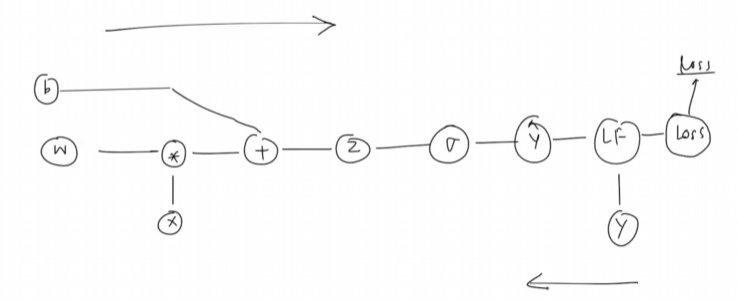

In [ ]:
print(w.grad)
print(b.grad)

tensor(6.6918)
tensor(0.9988)


we can also pass vectors to autograd

In [ ]:
x = torch.tensor([1.0,2.0,3.0], requires_grad=True)

In [ ]:
x

tensor([1., 2., 3.], requires_grad=True)

In [ ]:
y = (x**2).mean()

In [ ]:
y

tensor(4.6667, grad_fn=<MeanBackward0>)

In [ ]:
y.backward()

In [ ]:
x.grad

tensor([0.6667, 1.3333, 2.0000])

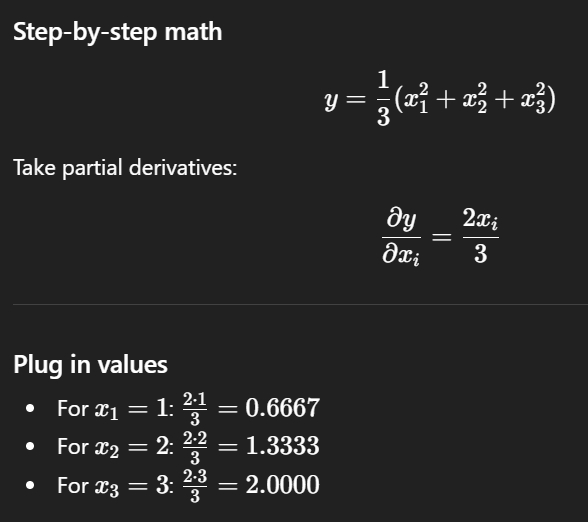

In [ ]:
# Clearning Gradients
x = torch.tensor(2.0, requires_grad=True)

In [ ]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [ ]:
y.backward()
x.grad

tensor(8.)

In [ ]:
x.grad.zero_()

tensor(0.)

x.grad.zero_() is used to reset (clear) the gradients stored in x.grad.

Why this is needed

In PyTorch, gradients accumulate by default

Every time you call .backward(), the new gradient is added to the existing one

If you don’t clear them, you’ll get incorrect gradients in loops (like training)

### Disable Gradient Tracking

we need to disable gradient tracking after training. Because while prediciton we just need forward tracking and not backward tracking. it will unnecessarily accumulate the memeory. So we have different methods to diable it:

In [ ]:
# option1: requires_grad_(False)
x.requires_grad_(False)

tensor(2.)

In [ ]:
y = x ** 2

In [ ]:
y # Now you cant see gradient function attribute in the output

tensor(4.)

In [ ]:
# now you cannot call y.backward()
y.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
# option2: detach()
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [ ]:
z = x.detach()
z

tensor(2.)

In [ ]:
y = x**2
y

tensor(4., grad_fn=<PowBackward0>)

In [ ]:
y1 = z ** 2
y1

tensor(4.)

In [ ]:
y.backward()

In [ ]:
y1.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
#option3: torch.no_grad()   -- most convinent
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [ ]:
with torch.no_grad():
  y = x**2

In [ ]:
y.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn